In [1]:
from datasets import load_dataset
from transformers import DistilBertTokenizer
import pandas as pd
import matplotlib.pyplot as plt
from utils import label_int2str, tokenize

/home/fabio/miniconda3/envs/banking/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
banking = load_dataset("banking77")

/home/fabio/.cache/huggingface/modules/datasets_modules/datasets/banking77/9898c11f6afa9521953d2ef205667b527bad14ef9cab445d470f16240c8c8ec4/banking77.py:59: FutureWarning: Dataset 'banking77' is deprecated and will be deleted. Use 'PolyAI/banking77' instead.
  warnings.warn(
Found cached dataset banking77 (/home/fabio/.cache/huggingface/datasets/banking77/default/1.1.0/9898c11f6afa9521953d2ef205667b527bad14ef9cab445d470f16240c8c8ec4)
100%|██████████| 2/2 [00:00<00:00, 1224.79it/s]


In [3]:
banking.set_format(type="pandas")
train_df = banking["train"][:]
train_df.head()

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11


In [4]:
train_df["label_name"] = train_df["label"].apply(
    label_int2str, args=(banking["train"],)
)
train_df.head()

,text,label,label_name
0,I am still waiting on my card?,11,card_arrival
1,What can I do if my card still hasn't arrived ...,11,card_arrival
2,I have been waiting over a week. Is the card s...,11,card_arrival
3,Can I track my card while it is in the process...,11,card_arrival
4,"How do I know if I will get my card, or if it ...",11,card_arrival


In [5]:
banking["train"].features["label"].num_classes

77

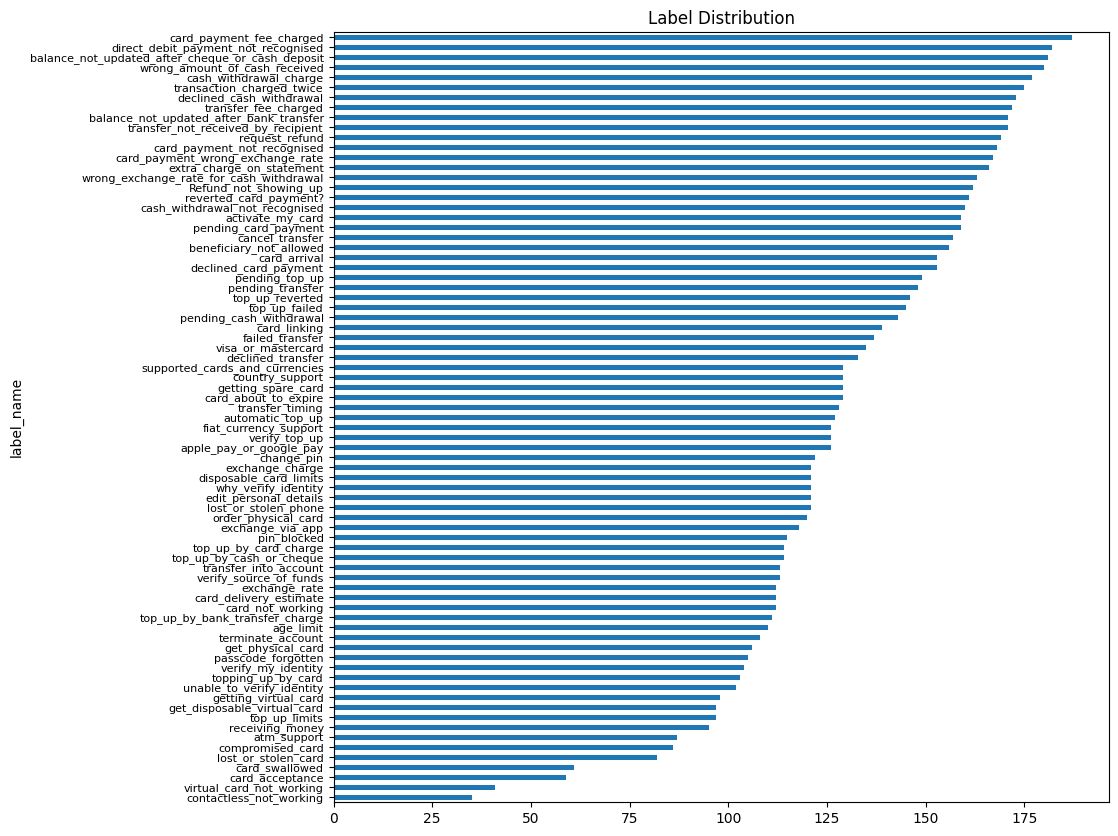

In [6]:
fig = plt.figure(figsize=(10, 10))
train_df["label_name"].value_counts(ascending=True).plot(kind="barh")
# lower font size for y axis tick labels
plt.yticks(fontsize=8)
plt.title("Label Distribution")
plt.show()

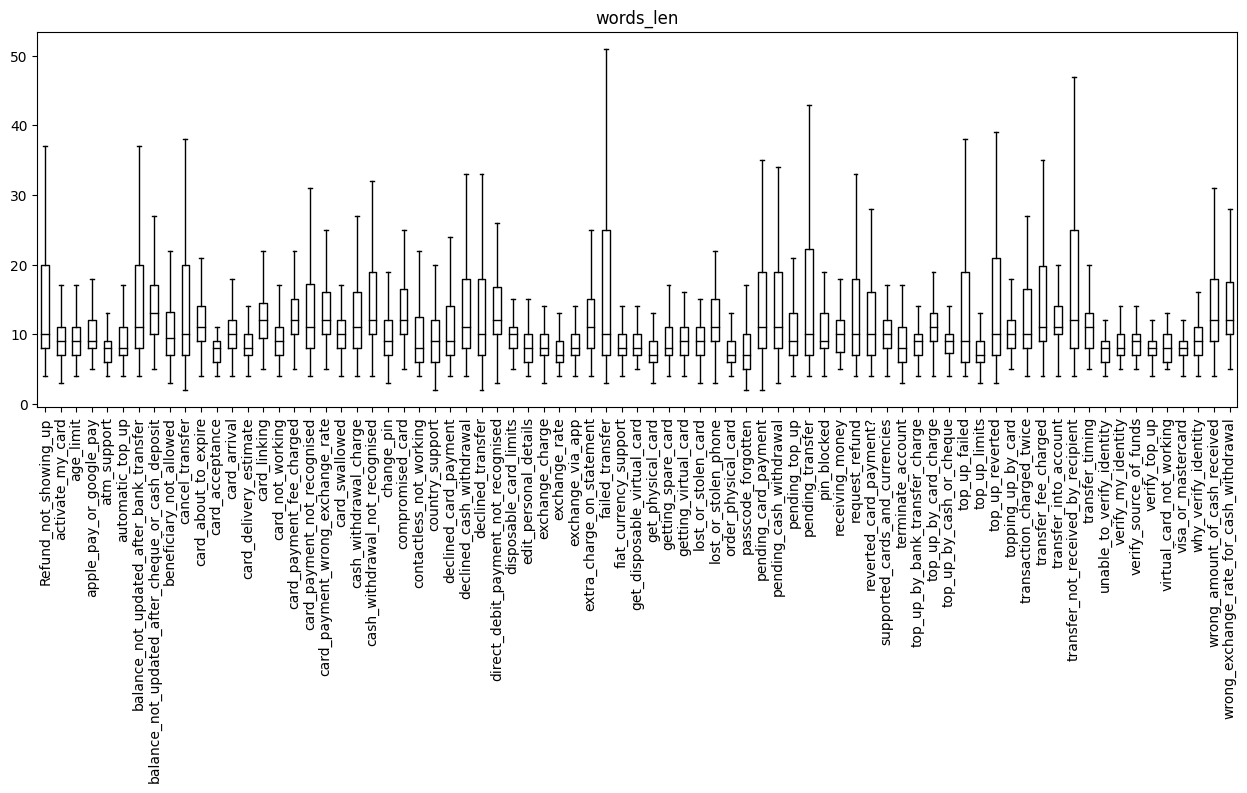

In [7]:
train_df["words_len"] = train_df["text"].str.split().apply(len)
train_df.boxplot(
    by="label_name",
    column="words_len",
    grid=False,
    figsize=(15, 5),
    showfliers=False,
    color="black",
)
plt.suptitle("")
plt.xlabel("")
# 90 rotation for x axis tick labels
plt.xticks(rotation=90)
plt.show()

In [8]:
model_ckpt = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [9]:
text = "I want to open a savings account."
token_text = tokenizer(text)
tokens = tokenizer.convert_ids_to_tokens(token_text.input_ids)
print(token_text)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))

{'input_ids': [101, 1045, 2215, 2000, 2330, 1037, 10995, 4070, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'i', 'want', 'to', 'open', 'a', 'savings', 'account', '.', '[SEP]']
[CLS] i want to open a savings account . [SEP]


In [12]:
banking.reset_format()
tokenize(banking["train"][:2], tokenizer)

{'input_ids': [[101, 1045, 2572, 2145, 3403, 2006, 2026, 4003, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 2064, 1045, 2079, 2065, 2026, 4003, 2145, 8440, 1005, 1056, 3369, 2044, 1016, 3134, 1029, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [16]:
encoded_train = banking["train"].map(
    tokenize, batched=True, batch_size=None, fn_kwargs={"tokenizer": tokenizer}
)
print(encoded_train.column_names)

Loading cached processed dataset at /home/fabio/.cache/huggingface/datasets/banking77/default/1.1.0/9898c11f6afa9521953d2ef205667b527bad14ef9cab445d470f16240c8c8ec4/cache-22d28ee6567d1b1c.arrow


['text', 'label', 'input_ids', 'attention_mask']
